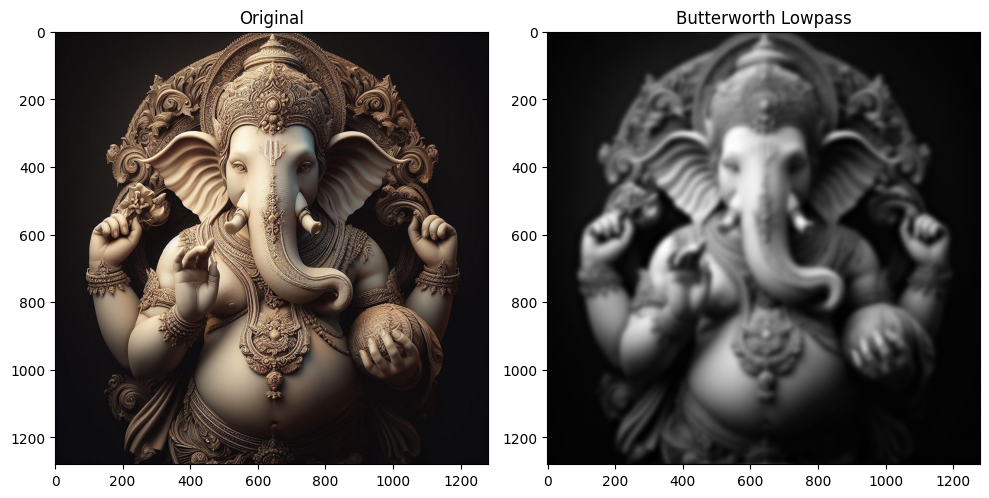

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def butterworth_lowpass_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / cutoff)**(2 * order))
    return H

def apply_butterworth_lowpass(img, cutoff=30, order=2):
    # Convert image to grayscale if needed
    if len(img.shape) == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img.copy()

    # DFT
    dft = np.fft.fft2(img_gray)
    dft_shift = np.fft.fftshift(dft)

    # Create Butterworth filter
    H = butterworth_lowpass_filter(img_gray.shape, cutoff, order)

    # Apply filter
    filtered_dft = dft_shift * H

    # Inverse DFT
    dft_shift_back = np.fft.ifftshift(filtered_dft)
    img_filtered = np.fft.ifft2(dft_shift_back)
    img_filtered = np.abs(img_filtered)

    return img_filtered

# Load image
img = cv2.imread('/content/diksha.jpg')  # Replace with your image path

# Apply Butterworth filter
filtered_img = apply_butterworth_lowpass(img, cutoff=40, order=2)

# Show results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(filtered_img, cmap='gray'), plt.title("Butterworth Lowpass")
plt.tight_layout()
plt.show()
